In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Importing the dataset

In [3]:
data = pd.read_csv('data/xclara.csv')

In [4]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [5]:
data.shape

(3000, 2)

### Getting the values and plotting it

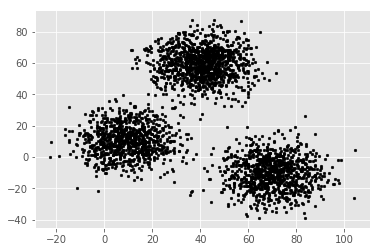

In [6]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

### Euclidean Distance Calculator

In [7]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

randomly create 3 starting points to form 3 clusters 

In [8]:
k = 3
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
C

array([[72., 17.],
       [55., 55.],
       [38., 64.]], dtype=float32)

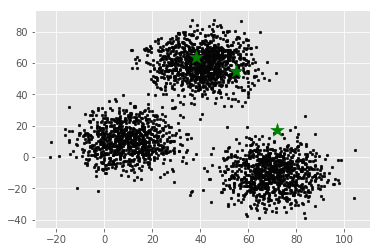

In [9]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

### To store the value of centroids when it updates

In [10]:
C_old = np.zeros(C.shape)

### Cluster Lables(0, 1, 2)

In [11]:
clusters = np.zeros(len(X))

### Error func. - Distance between new centroids and old centroids

In [12]:
error = dist(C, C_old, None)

### Loop will run till the error becomes zero

In [13]:
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

In [14]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

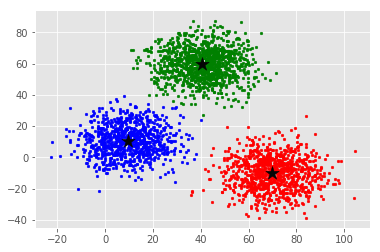

In [16]:
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## Using Scikit-learn package

In [23]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
# Number of clusters
kmeans = KMeans(n_clusters=3)


In [24]:
# Fitting the input data
kmeans = kmeans.fit(X)

In [25]:
# Getting the cluster labels
labels = kmeans.predict(X)

In [26]:
# Centroid values
centroids = kmeans.cluster_centers_

In [27]:
centroids

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

### Another example

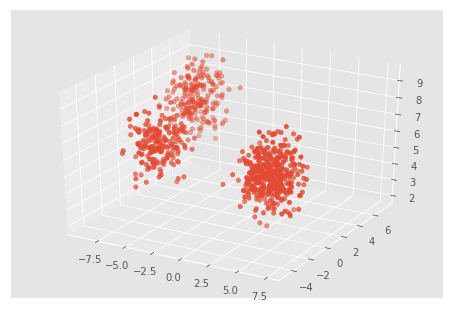

In [28]:
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [39]:
kmeans = KMeans(n_clusters=4)

In [40]:
kmeans = kmeans.fit(X)

In [41]:
labels = kmeans.predict(X)

In [42]:
C = kmeans.cluster_centers_

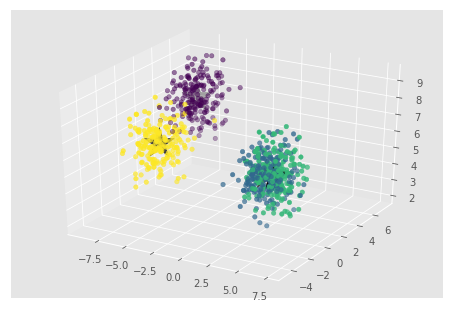

In [43]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)